In [13]:
import json
import pandas
from web3 import Web3
import seaborn as sns

In [2]:
f = open('snapshot.json')
data = json.load(f)
count = 0
for add in data.keys():
    count = count + data[add]
print(count)

10000


In [3]:
df = pandas.DataFrame(data.items(), columns=['address','no. of goop'])
df

,address,no. of goop
0,0x5A1ED1bEB3A8f5979c7f9920834Ee5e54415ffa0,2
1,0x4298e663517593284Ad4FE199b21815BD48a9969,2
2,0xC665A60F22dDa926B920DEB8FFAC0EF9D8a17460,46
3,0x5423Ed3bC1EaFD37A84D4f445eaE2662ec8ee475,5
4,0xD6dd6961D3224958FCd306B76a991ab974EC1Ebc,5
...,...,...
2619,0x8A56b8Aaf54A4824E3CA0dea8Ee56397260e3882,1
2620,0x39A73Ac5DA111f30aa5165F20FEdbeA04DDcF11e,4
2621,0xdA2ba9f10C336e76CD31b8A9005F05C7D560066a,3
2622,0x568B491Fb2b4B9440f6D05E7723Df0060fDAEF1c,1


In [4]:
df.iloc[0]['address']

'0x5A1ED1bEB3A8f5979c7f9920834Ee5e54415ffa0'

In [5]:
w3 = Web3(Web3.HTTPProvider('https://mainnet.infura.io/v3/54c5be375c3c427287641b5d18b1ec0d'))

In [6]:
balances = []
for add in df['address']:
    balances.append(w3.fromWei(w3.eth.get_balance(add),'ether'))


In [7]:
df['balance'] = balances

In [8]:
df.sort_values(by=['balance'], ascending=False).head(30)

,address,no. of goop,balance
625,0x000000000000000000000000000000000000dEaD,3,12551.375445892043866525
222,0x4897D38b0974051D8Fa34364E37a5993f4A966a5,6,1425.384259124353781452
122,0xf476Cd75BE8Fdd197AE0b466A2ec2ae44Da41897,1,1108.884984909658041067
519,0xD387A6E4e84a6C86bd90C158C6028A58CC8Ac459,1,686.897304182629525334
25,0x113d754Ff2e6Ca9Fd6aB51932493E4F9DabdF596,20,353.652466769028047913
965,0xC6A7463A7Ee700d035Aff7BFD1EE198D680A4164,11,273.811459232650831108
67,0x6B67623ff56c10d9dcFc2152425f90285fC74DDD,10,255.554383793626750216
1670,0xA99A76dDdBB9678bc33F39919Bc76d279C680C89,3,205.712815735239440007
2139,0x93e9594A8f2b5671aeE54b86283FA5A7261F93d7,2,203.00345565669635233
89,0x4322AA46ffEd67809862Da613725728e2fb8eAe3,5,199.651515552245280176


In [15]:
# remove the dead address

df = df.drop(625)
df.sort_values(by=['balance'], ascending=False).head(30)

,address,no. of goop,balance
222,0x4897D38b0974051D8Fa34364E37a5993f4A966a5,6,1425.384259124353781452
122,0xf476Cd75BE8Fdd197AE0b466A2ec2ae44Da41897,1,1108.884984909658041067
519,0xD387A6E4e84a6C86bd90C158C6028A58CC8Ac459,1,686.897304182629525334
25,0x113d754Ff2e6Ca9Fd6aB51932493E4F9DabdF596,20,353.652466769028047913
965,0xC6A7463A7Ee700d035Aff7BFD1EE198D680A4164,11,273.811459232650831108
67,0x6B67623ff56c10d9dcFc2152425f90285fC74DDD,10,255.554383793626750216
1670,0xA99A76dDdBB9678bc33F39919Bc76d279C680C89,3,205.712815735239440007
2139,0x93e9594A8f2b5671aeE54b86283FA5A7261F93d7,2,203.00345565669635233
89,0x4322AA46ffEd67809862Da613725728e2fb8eAe3,5,199.651515552245280176
119,0xAe7f458667f1B30746354aBC3157907d9F6FD15E,1,180.442354093382541409


In [9]:
df.sort_values(by=['no. of goop'], ascending=False)

,address,no. of goop,balance
20,0x38A4D889a1979133FbC1D58F970f0953E3715c26,421,14.374003959039280391
49,0x5c484894fe1AaaE696662943Abc6Cd7Dd50807d3,242,0
1828,0x67f72412A592D066A2e688e62664116dEAbEab29,153,2.52275241268725579
181,0x91E371C3CD3Aa81aF27b1602D4d8cf9D81ec5a90,138,13.475920464076163424
1049,0x1f2eb98b4e5a445B166Cf152E50c008B85ea17B1,135,0
...,...,...,...
1609,0x00897e2D7168165B81558C3CD9257eFb007F2410,1,0.119236499246938681
1607,0x8cC9A7bAf358AD226704e0cA9CD4F4C7C7b767B9,1,4.685020026521356195
1605,0xe699e84aBc6C23a4E5481d0352762f62a0aC1eAe,1,34.365865276661840269
540,0x701EE970b49Ec63Ae17d5E02bb947886B4ee530f,1,0.015884113874655408


<AxesSubplot:xlabel='balance', ylabel='no. of goop'>

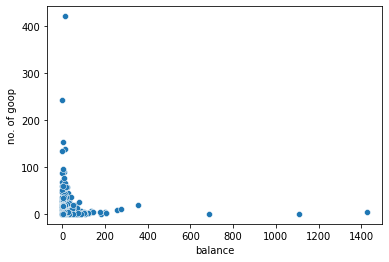

In [16]:
# chart plotting eth balance against no. of goops held
sns.scatterplot(data=df, x='balance',y='no. of goop')

<AxesSubplot:xlabel='balance', ylabel='no. of goop'>

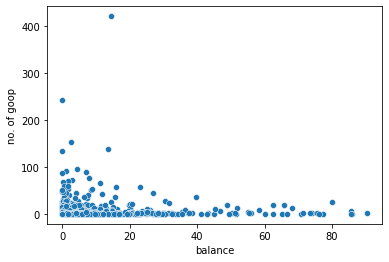

In [23]:
smaller_balances = df.where(df['balance']<100)
sns.scatterplot(data=smaller_balances, x='balance',y='no. of goop')
